In [10]:
import pyspark
from matplotlib.pyplot import colormaps
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Spark SQL").getOrCreate()

df1 = spark.read.csv("Twitter_Data.csv", header=True, inferSchema=True)
df2 = spark.read.csv("Reddit_Data.csv", header=True, inferSchema=True)

df1 = df1.na.drop()
df2 = df2.na.drop()

df2 = df2.withColumnRenamed("clean_comment", "clean_text")

df = df1.union(df2)

df.show()

+--------------------+--------+
|          clean_text|category|
+--------------------+--------+
|when modi promise...|      -1|
|talk all the nons...|       0|
|what did just say...|       1|
|asking his suppor...|       1|
|answer who among ...|       1|
|kiya tho refresh ...|       0|
|this comes from c...|       0|
|with upcoming ele...|       1|
|gandhi was gay do...|       1|
|things like demon...|       1|
|hope tuthukudi pe...|       1|
|calm waters where...|       1|
|one vote can make...|       0|
|one vote can make...|       0|
|vote such party a...|      -1|
|vote modi who has...|       0|
|through our vote ...|       0|
|didn’ write chowk...|      -1|
|was the one who r...|       1|
|with firm belief ...|      -1|
+--------------------+--------+
only showing top 20 rows



DataFrame[clean_text: string, category: int]

In [33]:
from pyspark.sql.functions import when, col
df = df.withColumn(
    'category_label',
    when(col('category') == -1, 'Negative')
    .when(col('category') == 0, 'Neutral')
    .when(col('category') == 1, 'Positive')
    .otherwise('Unknown')
)

df.show()

+--------------------+--------+--------------+
|          clean_text|category|category_label|
+--------------------+--------+--------------+
|when modi promise...|      -1|      Negative|
|talk all the nons...|       0|       Neutral|
|what did just say...|       1|      Positive|
|asking his suppor...|       1|      Positive|
|answer who among ...|       1|      Positive|
|kiya tho refresh ...|       0|       Neutral|
|this comes from c...|       0|       Neutral|
|with upcoming ele...|       1|      Positive|
|gandhi was gay do...|       1|      Positive|
|things like demon...|       1|      Positive|
|hope tuthukudi pe...|       1|      Positive|
|calm waters where...|       1|      Positive|
|one vote can make...|       0|       Neutral|
|one vote can make...|       0|       Neutral|
|vote such party a...|      -1|      Negative|
|vote modi who has...|       0|       Neutral|
|through our vote ...|       0|       Neutral|
|didn’ write chowk...|      -1|      Negative|
|was the one 

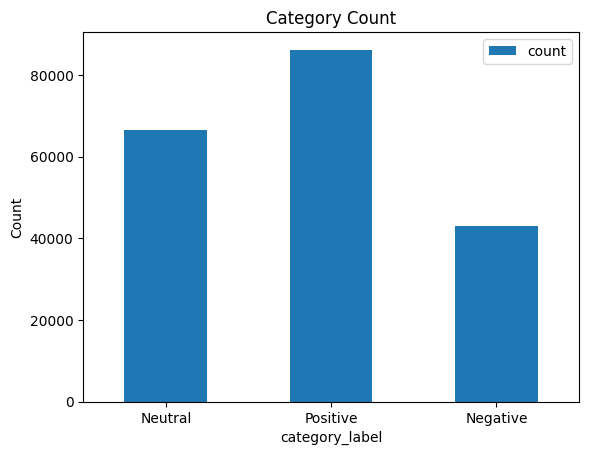

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df.groupBy("category_label").count()
pandas_df = df_grouped.toPandas()
pandas_df.set_index("category_label", inplace=True)
pandas_df.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Category Count")
plt.show()

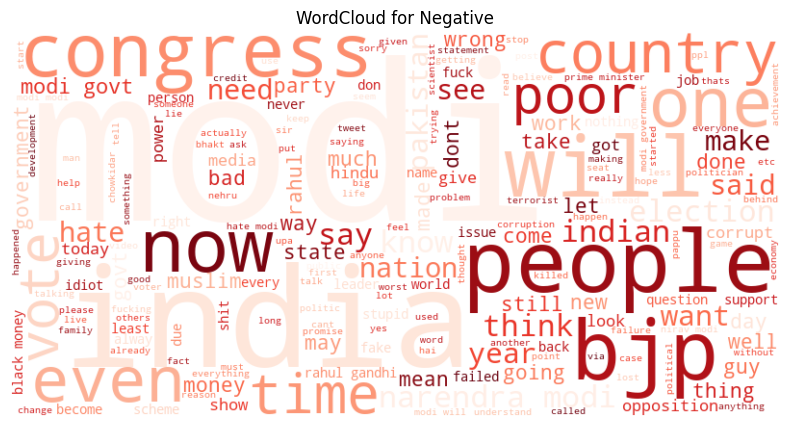

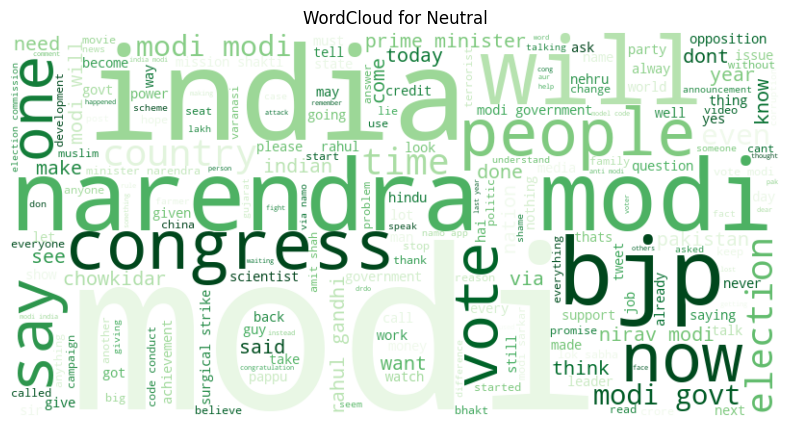

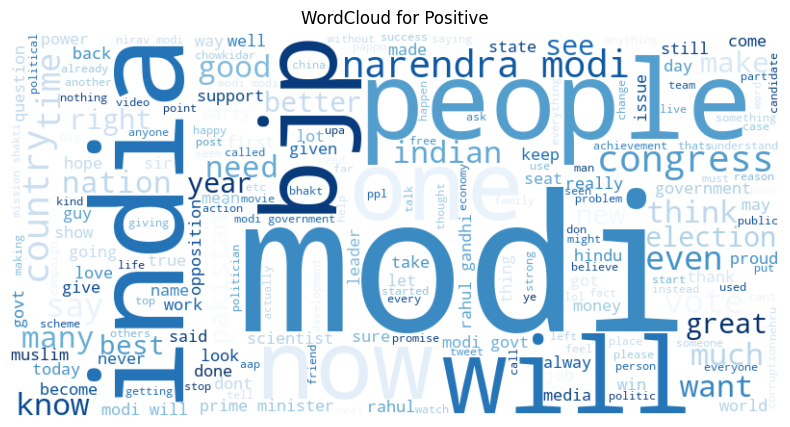

In [62]:
from pyspark.sql.functions import regexp_replace, col, lower

df = df.withColumn("clean_text",
              lower(col("clean_text")))
df = df.withColumn("clean_text",
              regexp_replace(col("clean_text"),
                             r"[^a-z\s]",""))

df_negative = df.filter(col("category") == -1).select("clean_text")
df_neutral = df.filter(col("category") == 0).select("clean_text")
df_positive = df.filter(col("category") == 1).select("clean_text")

negative_text = " ".join(row["clean_text"] for row in df_negative.collect())
neutral_text = " ".join(row["clean_text"] for row in df_neutral.collect())
positive_text = " ".join(row["clean_text"] for row in df_positive.collect())

def create_wordcloud(text, title, colormap):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=colormap
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud,
               interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {title}")
    plt.show()

create_wordcloud(negative_text, "Negative", "Reds")
create_wordcloud(neutral_text, "Neutral", "Greens")
create_wordcloud(positive_text, "Positive", "Blues")
